In [114]:
import pandas as pd
import numpy as np
import seaborn as sns

In [115]:
pd.set_option('display.max_columns', None)

In [116]:
df = pd.read_csv('data_after_feature_engg.csv')

In [117]:
df.head()

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Text_info,Super Built-up Area,floor_ratio
0,0,1.0,2,2.0,1,0,0.0,0.61,8840.0,0,0,1,0,1,1,0,0,1,0,0,0,3,90,88,"Green court society, which is bang on 60-Meter...",690.0,1.000000
1,1,3.0,2,2.0,1,0,0.0,0.70,10144.0,0,0,1,0,1,1,0,0,1,0,0,0,3,90,83,"Green court society, which is bang on 60-Meter...",690.0,0.571429
2,2,4.0,2,2.0,1,1,1.0,0.71,8492.0,0,0,0,0,0,1,0,1,1,0,0,0,3,70,99,Available for sale 2 bhk semi furnished in pyr...,836.0,0.529412
3,3,0.0,2,2.0,2,1,1.0,1.55,12301.0,0,0,0,0,0,1,0,1,1,1,0,0,1,68,73,Looking for a 2 bhk property for sale in gurga...,1260.0,0.450000
4,4,2.0,2,2.0,4,1,1.0,1.30,9516.0,0,0,0,0,0,0,0,1,1,1,0,0,3,107,81,This 2 bhk apartment is available for sale in ...,1366.0,0.071429


In [118]:
df = df.drop(columns = ['Unnamed: 0' , 'Text_info' ])

In [119]:
df.isna().sum()

Facing                      0
No_Bedroom                  0
No_Bathroom                 0
No_Balcony                  0
Corner_Property             0
Furnishing                  0
Price_in_Crore              0
price_Per_Sqft_converted    0
study room                  0
servant room                0
store room                  0
pooja room                  0
Overlooking_others          0
Overlooking_main road       0
Overlooking_sea facing      0
Overlooking_club            0
Overlooking_park/garden     0
Overlooking_pool            0
Overlooking_lake facing     0
Overlooking_NA              0
flat_age                    0
sector_num                  0
luxury_score                0
Super Built-up Area         0
floor_ratio                 1
dtype: int64

In [120]:
df.shape

(12444, 25)

In [121]:
df['Furnishing'].value_counts()

Furnishing
1.0    9691
0.0    2221
2.0     532
Name: count, dtype: int64

In [122]:
df = df.dropna()

In [123]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Budget"
    elif 50 <= score < 135:
        return "Standard"
    elif 135 <= score :
        return "Luxury"
    else:
        return None

In [124]:
df['luxury_category'] = df['luxury_score'].apply(categorize_luxury)

In [125]:
def categorize_floor(floor):
    if  floor <= 0.33:
        return "Low Floor"
    elif 0.33 < floor <= 0.66:
        return "Mid Floor"
    elif floor > 0.66:
        return "High Floor"
    else:
        return None

In [126]:
df['floor_category'] = df['floor_ratio'].apply(categorize_floor)

In [127]:
df = df.drop(columns = ['luxury_score' , 'price_Per_Sqft_converted' , 'floor_ratio'])

In [128]:
df[df['floor_category'].isna() == True]

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,Super Built-up Area,luxury_category,floor_category


In [133]:
df = df[df['Super Built-up Area'] <= 20000]

In [134]:
data_label_encoded.shape

(12443, 24)

In [135]:
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

X_label = data_label_encoded.drop('Price_in_Crore', axis=1)
y_label = data_label_encoded['Price_in_Crore']


[array(['Budget', 'Luxury', 'Standard'], dtype=object)]
[array(['High Floor', 'Low Floor', 'Mid Floor'], dtype=object)]


In [136]:
print(X_label.shape)
print(y_label.shape)

(12437, 23)
(12437,)


In [137]:
data_label_encoded.head()

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,Super Built-up Area,luxury_category,floor_category
0,1.0,2,2.0,1,0,0.0,0.61,0,0,1,0,1,1,0,0,1,0,0,0,3,90,690.0,2.0,0.0
1,3.0,2,2.0,1,0,0.0,0.70,0,0,1,0,1,1,0,0,1,0,0,0,3,90,690.0,2.0,2.0
2,4.0,2,2.0,1,1,1.0,0.71,0,0,0,0,0,1,0,1,1,0,0,0,3,70,836.0,2.0,2.0
3,0.0,2,2.0,2,1,1.0,1.55,0,0,0,0,0,1,0,1,1,1,0,0,1,68,1260.0,2.0,2.0
4,2.0,2,2.0,4,1,1.0,1.30,0,0,0,0,0,0,0,1,1,1,0,0,3,107,1366.0,2.0,1.0


In [138]:
X_label.shape

(12437, 23)

# Technique 1 - Correlation Analysis

<Axes: >

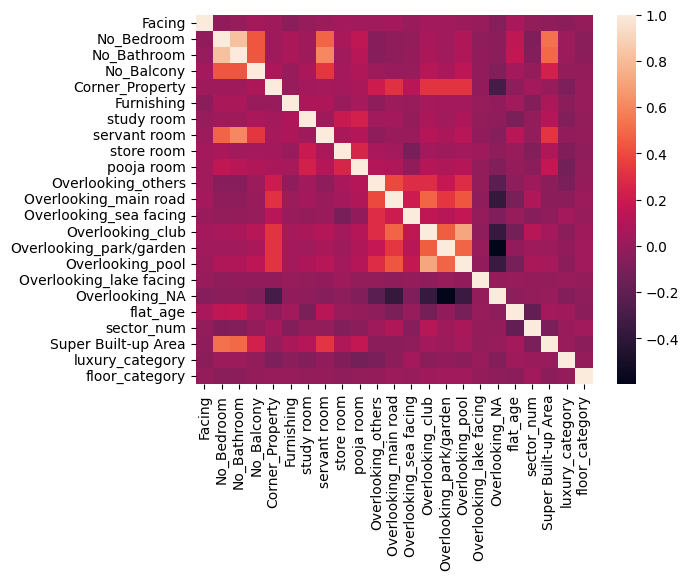

In [69]:
sns.heatmap(X_label.corr())

In [70]:
fi_df1 = data_label_encoded.corr()['Price_in_Crore'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','Price_in_Crore':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,No_Bedroom,0.441263
1,No_Bathroom,0.458276
2,No_Balcony,0.184637
3,Corner_Property,-0.016550
4,Furnishing,0.097310
5,Price_in_Crore,1.000000
6,study room,0.123229
7,servant room,0.299905
8,store room,0.110479
9,pooja room,0.154372


# Technique 2 - Random Forest Feature Importance

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
20,Super Built-up Area,5.738828e-01
19,sector_num,3.608285e-01
2,No_Bathroom,1.154746e-02
1,No_Bedroom,1.054007e-02
18,flat_age,8.097530e-03
7,servant room,4.643893e-03
0,Facing,3.649282e-03
3,No_Balcony,2.800572e-03
21,luxury_category,2.784820e-03
22,floor_category,2.224596e-03


# Technique 3 - Gradient Boosting Feature importances

In [72]:
from sklearn.ensemble import GradientBoostingRegressor


gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)


fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
20,Super Built-up Area,0.572871
19,sector_num,0.388840
2,No_Bathroom,0.016111
1,No_Bedroom,0.007068
5,Furnishing,0.003647
17,Overlooking_NA,0.003524
7,servant room,0.003382
18,flat_age,0.001502
15,Overlooking_pool,0.000731
3,No_Balcony,0.000661


# Technique 4 - Permutation Importance

In [73]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
20,Super Built-up Area,1.003366
19,sector_num,0.551663
2,No_Bathroom,0.012131
1,No_Bedroom,0.006225
7,servant room,0.005931
18,flat_age,0.004701
3,No_Balcony,0.002520
21,luxury_category,0.001918
15,Overlooking_pool,0.001094
5,Furnishing,0.000932


# Technique 5 - RFE

In [74]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

selected_features = X_label.columns[selector_label.support_]

selected_coefficients = selector_label.estimator_.feature_importances_

fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
20,Super Built-up Area,5.759440e-01
19,sector_num,3.593397e-01
2,No_Bathroom,1.152623e-02
1,No_Bedroom,9.787061e-03
18,flat_age,7.902860e-03
7,servant room,4.998628e-03
0,Facing,3.928012e-03
21,luxury_category,2.792469e-03
3,No_Balcony,2.760171e-03
22,floor_category,2.372317e-03


# Technique 6 - SHAP

In [75]:
import shap

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 2.38039491e-04, -7.33029446e-02, -7.29879294e-02, ...,
        -2.04101308e+00, -1.17844559e-03, -9.18106860e-03],
       [ 2.64966962e-04, -7.18486307e-02, -7.23568145e-02, ...,
        -2.02497238e+00,  1.96881421e-03,  5.23116197e-03],
       [-4.02000464e-03, -9.19053652e-02, -1.15571598e-01, ...,
        -2.14182413e+00, -5.57818604e-03,  3.84250410e-04],
       ...,
       [-7.07709733e-03, -7.59528207e-02,  3.24293518e-02, ...,
        -6.46572813e-01,  7.42711117e-03,  2.81018283e-03],
       [ 2.09509427e-02,  5.47104063e-02,  1.08636442e-01, ...,
        -2.97138285e-01,  8.37094424e-03,  4.85332774e-03],
       [-7.43941081e-02,  1.00424575e-01,  1.56928018e-02, ...,
         1.57715350e+00,  8.68318950e-04,  2.65712945e-03]])

In [76]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
20,Super Built-up Area,1.509133
19,sector_num,0.755112
1,No_Bedroom,0.090985
2,No_Bathroom,0.071010
18,flat_age,0.056990
7,servant room,0.056600
3,No_Balcony,0.021319
0,Facing,0.019354
21,luxury_category,0.017045
13,Overlooking_club,0.014795


In [77]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df6,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [78]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,rfe_score,SHAP_score
feature,,,,,,
No_Bedroom,0.441263,1.054007e-02,0.007068,0.006225,9.787061e-03,0.090985
No_Bathroom,0.458276,1.154746e-02,0.016111,0.012131,1.152623e-02,0.071010
No_Balcony,0.184637,2.800572e-03,0.000661,0.002520,2.760171e-03,0.021319
Corner_Property,-0.016550,1.580154e-03,0.000068,0.000472,1.564069e-03,0.008108
Furnishing,0.097310,2.042382e-03,0.003647,0.000932,1.995306e-03,0.014429
study room,0.123229,1.422817e-03,0.000000,0.000894,1.787177e-03,0.008967
servant room,0.299905,4.643893e-03,0.003382,0.005931,4.998628e-03,0.056600
store room,0.110479,1.466282e-03,0.000137,-0.000867,1.576968e-03,0.006276
pooja room,0.154372,1.527460e-03,0.000211,0.000834,1.555233e-03,0.008301


In [79]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [80]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
Super Built-up Area        5.832600e-01
sector_num                 3.475835e-01
No_Bathroom                1.464646e-02
No_Bedroom                 1.302796e-02
flat_age                   8.331909e-03
servant room               7.556826e-03
No_Balcony                 3.146901e-03
Furnishing                 2.727877e-03
luxury_category            2.686380e-03
Overlooking_pool           2.146897e-03
Overlooking_club           1.962827e-03
floor_category             1.863027e-03
Overlooking_main road      1.711970e-03
Overlooking_NA             1.530979e-03
study room                 1.422048e-03
pooja room                 1.381861e-03
Corner_Property            1.305837e-03
Overlooking_others         1.236469e-03
store room                 9.955521e-04
Overlooking_park/garden    9.485173e-04
Overlooking_sea facing     5.259506e-04
Overlooking_lake facing    1.866843e-07
dtype: float64

In [139]:
X_label

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,Super Built-up Area,luxury_category,floor_category
0,1.0,2,2.0,1,0,0.0,0,0,1,0,1,1,0,0,1,0,0,0,3,90,690.0,2.0,0.0
1,3.0,2,2.0,1,0,0.0,0,0,1,0,1,1,0,0,1,0,0,0,3,90,690.0,2.0,2.0
2,4.0,2,2.0,1,1,1.0,0,0,0,0,0,1,0,1,1,0,0,0,3,70,836.0,2.0,2.0
3,0.0,2,2.0,2,1,1.0,0,0,0,0,0,1,0,1,1,1,0,0,1,68,1260.0,2.0,2.0
4,2.0,2,2.0,4,1,1.0,0,0,0,0,0,0,0,1,1,1,0,0,3,107,1366.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12439,5.0,3,4.0,2,0,1.0,0,1,0,0,0,1,0,1,1,1,0,0,3,82,1790.0,2.0,1.0
12440,2.0,3,3.0,2,1,1.0,0,0,0,0,1,1,0,1,1,1,0,0,4,49,1805.0,1.0,1.0
12441,2.0,3,4.0,4,1,1.0,0,1,0,0,0,1,0,1,1,1,0,0,3,68,1999.0,1.0,1.0
12442,2.0,4,5.0,4,1,1.0,0,1,0,0,0,0,0,1,1,0,0,0,4,49,2383.0,1.0,2.0


In [89]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [90]:
scores.mean()

np.float64(0.8842830999369395)

In [101]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['Overlooking_lake facing', 'Overlooking_sea facing', 'Overlooking_park/garden' ,'Overlooking_others'  ]), y_label, cv=5, scoring='r2')

In [102]:
scores.mean()

np.float64(0.885949648904707)

In [140]:
export_df = X_label.drop(columns=['Overlooking_lake facing', 'Overlooking_sea facing', 'Overlooking_others' , 'Overlooking_park/garden'])
export_df['price'] = y_label

In [144]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [145]:
export_df.head()

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,study room,servant room,store room,pooja room,Overlooking_main road,Overlooking_club,Overlooking_pool,Overlooking_NA,flat_age,sector_num,Super Built-up Area,luxury_category,floor_category,price
0,1.0,2,2.0,1,0,0.0,0,0,1,0,1,0,0,0,3,90,690.0,2.0,0.0,0.61
1,3.0,2,2.0,1,0,0.0,0,0,1,0,1,0,0,0,3,90,690.0,2.0,2.0,0.70
2,4.0,2,2.0,1,1,1.0,0,0,0,0,1,1,0,0,3,70,836.0,2.0,2.0,0.71
3,0.0,2,2.0,2,1,1.0,0,0,0,0,1,1,1,0,1,68,1260.0,2.0,2.0,1.55
4,2.0,2,2.0,4,1,1.0,0,0,0,0,0,1,1,0,3,107,1366.0,2.0,1.0,1.30


In [146]:
export_df['Furnishing'].value_counts()

Furnishing
1.0    9686
0.0    2220
2.0     531
Name: count, dtype: int64

In [147]:
export_df.shape

(12437, 20)